# SIMPLE SINGLE IRS SIMULATION

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random

from Functions import *


User positions:
 [[  63.34304487 -176.51253917]
 [ 296.54249106  354.88783884]
 [ 148.79106636 -196.04881794]
 [-185.3541595  -380.71985186]
 [ 376.85392437  256.75062538]
 [-233.53764539    4.25345599]
 [ -98.37329909  170.13882849]
 [-144.86556758 -273.47890582]
 [ 153.99113205  122.01193007]
 [-169.9082487   431.35993627]
 [ 165.0466894  -309.08655368]
 [  67.29932326  240.66220468]
 [ 370.36505527  101.20144011]
 [ 370.40626712 -121.92816743]
 [ 426.23483549  177.06044258]
 [  55.02612927  147.73545001]
 [ 384.65840209  125.97416695]
 [-218.96531298  -51.96211312]
 [-254.35123898  362.14616844]
 [ 217.06476182 -250.24935101]
 [-122.14154793   34.07960041]
 [  90.16109534  433.09495675]
 [ 238.18534616  398.95671423]
 [ -16.12423659 -257.16130616]
 [-320.66248134   20.40477762]
 [-380.78443709  -40.23985685]
 [ -39.38163675  -53.25554735]
 [-489.49589338   13.35555436]
 [   3.19956273   11.3289506 ]
 [ 111.60922751  373.54849656]
 [-474.60091559   25.69224361]
 [-190.8551646  -228.6

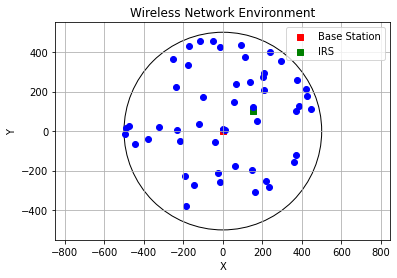

Link Budget: 
[-38.70822054 -43.46216865 -41.16267237 -48.78353985 -43.30744801
 -46.06886959 -30.63558142 -46.5791336  -22.97984307 -46.6540447
 -46.68688714 -42.96568789 -44.56159565 -45.65011233 -40.9413074
 -24.50397814 -40.08567691 -40.14439919 -39.79567334 -40.61592528
 -35.09563641 -51.68713165 -45.37498533 -46.08122294 -44.61053527
 -45.02864517 -26.15077599 -49.21987239  -1.00927595 -42.52225506
 -53.2774748  -45.59042544 -23.25559065 -50.60824401 -53.72530377
 -35.72358671 -50.20976413 -45.53839653 -34.14626205 -45.22139925
 -42.08914026 -37.60150767 -31.80967148 -47.38372304 -45.31689478
 -44.210762   -49.45752781  -0.76662814 -41.00443271 -42.77466745]
(1, 50)

SNR of all users (in dB): 
[ 94.29177946  89.53783135  91.83732763  84.21646015  89.69255199
  86.93113041 102.36441858  86.4208664  110.02015693  86.3459553
  86.31311286  90.03431211  88.43840435  87.34988767  92.0586926
 108.49602186  92.91432309  92.85560081  93.20432666  92.38407472
  97.90436359  81.31286835  8

In [77]:

# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 50
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (150,100)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)
print('User positions:'"\n", user_positions)
print()

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Generate the Rayleigh Fading Channel for each user
h_m = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
h_m = h_m.reshape(1,-1)
print('h_m:'"\n", h_m)
print(np.shape(h_m))    
print()

f_m = []
fading = []
for user in range(NUM_USERS_NEW):
    fading.append(generate_nakagami_samples(m, omega, N))
f_m = np.array(fading)
print('f_m:'"\n",f_m) 
print(np.shape(f_m))   
print()

f_m_transpose = np.transpose(f_m)
print('f_m_transpose:'"\n",f_m_transpose) 
print(np.shape(f_m_transpose))  
print()

# Generate the Nakagami Channel from base_station to the IRS (g)
g = generate_nakagami_samples(m, omega, N)
g = g.reshape(N,1)
print('g:'"\n", g) 
print(np.shape(g)) 
print()

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each column index
for column_index in range(NUM_USERS_NEW):
    # Extract the single column from f_m_transpose using indexing and transpose
    single_column = f_m_transpose[:, column_index]
    single_column = single_column.reshape(1, N)  # Reshape to (1, N)

    # Perform element-wise multiplication of the single row with g
    result = np.dot(single_column, g)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.squeeze(results_list)
results_array = results_array.reshape(1,NUM_USERS_NEW)
print()
print('Results array:', results_array)
print('Shape of results array:', results_array.shape) 

# Determine the angle associated with each complex number in radians
angles_radians = np.angle(results_array)
print('Phases of results array:'"\n", angles_radians) 
print()
print('Phases of nullifying array:'"\n", -1*angles_radians) 
print()

# Compute the array that will nullify the angle/phase to give us the scalar value
r = 1
exp_results = r * np.exp(1j *-1*angles_radians)

# Print the polar form of the complex numbers
for i in range(len(exp_results)):
    print(f"Nullifying array output: \n{exp_results[i]}")

# Compute the product that will nullify the angle/phase to give us the scalar value
product = exp_results * results_array
product_numerator = product.real
print()
print('Product : '"\n", product)
print('Product numerator: '"\n", product_numerator)
print(np.shape(product_numerator)) 

link_inter = []

for i in range(NUM_USERS_NEW):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][i])/(d_m[0][i])**PATH_LOSS_EXPONENT + (product_numerator[0][i])/((d_rm[0][i])**BETA * (d_i)**BETA)))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(link_inter)
link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10(link_inter_array) + 30 
link_budget = link_budget.reshape(1,NUM_USERS_NEW)

#Calculate the noise value
noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(NUM_USERS_NEW):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)

# Calculate rate 
rate_matrix = compute_rate(SNR_matrix)

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(NUM_USERS_NEW, rate_matrix.flatten(), RATE_THRESHOLD)
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Print link budget values
print('Link Budget: ') 
for element in link_budget:
    print(element)
print(np.shape(link_budget)) 
print() 

# Print SNR values
print('SNR of all users (in dB): ')
for element in SNR_matrix:
    print(element)
print(np.shape(SNR_matrix)) 
print() 

# Print rate values
print('Rate of all users (in bps/Hz): ')
for element in rate_matrix:
    print(element)
print(np.shape(rate_matrix)) 

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

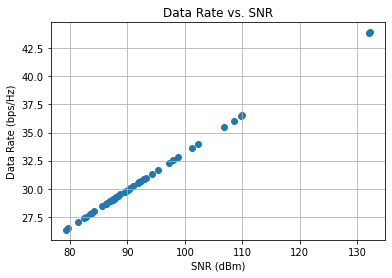

In [78]:
plt.scatter(SNR_matrix, rate_matrix)
plt.xlabel('SNR (dBm)')
plt.ylabel('Data Rate (bps/Hz)')
plt.title('Data Rate vs. SNR')
plt.grid(True)
plt.show()

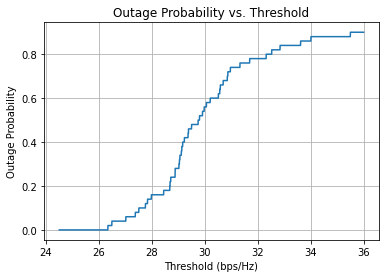

In [79]:
# Assuming you have an array 'threshold' containing the threshold values
threshold = np.arange(24.5,36, 0.001)

outage_probability = np.zeros(len(threshold))

# Calculating the outage probability for each threshold
for i in range(len(threshold)):
    outage_probability[i] = np.mean(rate_matrix.flatten() <= threshold[i])

# Plotting the outage probability vs. threshold
plt.plot(threshold, outage_probability)
plt.xlabel('Threshold (bps/Hz)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability vs. Threshold')
plt.grid(True)
plt.show()

# BASIC SETUP FOR 100 SIMULATIONS FOR SINGLE CELL (WITH & WITHOUT IRS)

d_m:
 [[311.56410941 290.49586551 276.15613305 471.45184721 254.31850186
  358.66293323 489.89068049 312.15125845 326.95868618 349.42914325
  436.44538077 330.61127217 263.62766534 292.41490128 116.71011298
  465.8490574  339.33456118 222.56755309 164.1972078  248.6087661
  426.30111724 341.46611318 105.6860441  356.3132861  437.38270384
  194.94323608 291.43360017 350.63326003 482.77472818 410.11314561]]
(1, 30)

d_rm:
 [[310.24298618 288.56498185 249.84690933 443.98053986 265.18218736
  342.81878487 515.40191285 323.04159843 345.12105986 332.90418049
  454.24023853 351.8544529  277.67795325 315.8186357  134.56799409
  482.98572784 367.54851959 234.13743165 181.41222659 275.55984099
  403.73556651 322.83801797  80.1156863  334.04973707 422.95545773
  166.976384   319.51738894 361.0466669  462.74904923 421.11305923]]
(1, 30)

d_i:
 [[28.28427125]]
(1, 1)



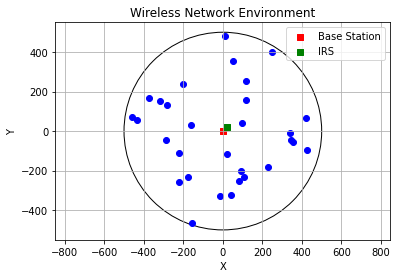

In [80]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 30
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (20,20)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 100 SIMULATIONS FOR SINGLE CELL (W/O IRS)

In [81]:
NUM_SIMULATIONS = 50

# Initialize list to store individual outage probabilities
outage_probabilities_1 = []

# Perform simulations
for i in range(NUM_SIMULATIONS):
    
    # Generate the Rayleigh Fading Channel for each user to the base station
    rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
    
    # Calculate link budget
    link_budget_1 = calc_link_budget(rayleigh_channel, d_m.flatten(), PATH_LOSS_EXPONENT, TRANSMIT_POWER_WATTS)
    
    # Calculate SNR
    SNR_1 = compute_SNR(link_budget_1, noise)

    # Calculate rate 
    rate = compute_rate(SNR_1)
    
    # Compute outage probability at each iteration
    outage_probability_1 = compute_outage_probability(NUM_USERS_NEW, rate, RATE_THRESHOLD)
    outage_probabilities_1.append(outage_probability_1)
    
# Compute average outage probability
average_outage_probability_1 = compute_average_outage_probability(outage_probabilities_1)
print()
print('Average Outage Probability (Only BS): ', "{:.3f}".format(average_outage_probability_1))


Average Outage Probability (Only BS):  0.601


# 100 SIMULATIONS FOR SINGLE CELL (WITH IRS)

In [82]:
# Initialize list to store individual outage probabilities
outage_probabilities_2 = []

#Performing for IRS
h_m = np.array(rayleigh_channel)
h_m = h_m.reshape(1,-1)

# Perform simulations
for i in range(NUM_SIMULATIONS):
    # Generate the Nakagami Channel from each user to the IRS (f_m)
    f_m = []
    fading = []
    for user in range(NUM_USERS_NEW):
        fading.append(generate_nakagami_samples(m, omega, N))
    f_m = np.array(fading)
    
    f_m_transpose = np.transpose(f_m)
    # Generate the Nakagami Channel from base_station to the IRS (g)
    g = generate_nakagami_samples(m, omega, N)
    g = g.reshape(N,1)
    
    # Initialize an empty list to store the results for each column
    results_list = []
    
    # Loop over each column index
    for column_index in range(NUM_USERS_NEW):
        
        # Extract the single column from f_m_transpose using indexing and transpose
        single_column = f_m_transpose[:, column_index]
        single_column = single_column.reshape(1, N)  # Reshape to (1, N)
        
        # Perform element-wise multiplication of the single row with g
        result = np.dot(single_column, g)
        results_list.append(result)
        
    # Convert the list of results into a numpy array
    results_array = np.squeeze(results_list)
    results_array = results_array.reshape(1,NUM_USERS_NEW)
    
    # Determine the angle associated with each complex number in radians
    angles_radians = np.angle(results_array)
    
    # Compute the array that will nullify the angle/phase to give us the scalar value
    r = 1
    polar_results = r * np.exp(1j *-1*angles_radians)
    
    # Compute the product that will nullify the angle/phase to give us the scalar value
    product = polar_results * results_array
    product_numerator = product.real
    
    # Compute the interediate link budget (in watts) for each user in the system
    link_inter = []
    for j in range(NUM_USERS_NEW):
        link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(d_m[0][j])**PATH_LOSS_EXPONENT + (product_numerator[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
        link_inter.append(link_inter_value)  # Append the computed value to the list
        
    # Convert the list to a numpy array
    link_inter = np.array(link_inter)
    link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
    
    # Calculate link_budget using the updated link_inter array
    link_budget = 10 * np.log10(link_inter_array) + 30  # Need to add actual noise power
    link_budget = link_budget.reshape(1,NUM_USERS_NEW)
    
    #Calculate the noise value
    noise = -133 # in dBm
    
    SNR_matrix = []
    # Calculate SNR
    for k in range(NUM_USERS_NEW):
        SNR = compute_SNR(link_budget[0][k], noise)
        SNR_matrix.append(SNR)
    
    SNR_matrix = np.array(SNR_matrix)
    SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
    
    # Calculate rate 
    rate_matrix = compute_rate(SNR_matrix)
    rate_matrix_new = rate_matrix.flatten()
    
    # Compute outage probability at each iteration
    outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
    outage_probabilities_2.append(outage_probability_2)
    # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
    
# Compute average outage probability
average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
print()
print('Average Outage Probability (BS + IRS): ', "{:.3f}".format(average_outage_probability_2))


Average Outage Probability (BS + IRS):  0.005


# Changing the RIS position within the cell and plotting the outage probability

In [88]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 30
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

#IRS_POSITION = (20,20)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

d_m:
 [[291.43138267 419.65492889 247.5554918  451.5137371  243.42298804
  310.40668272 421.66742637 438.58050203 395.70682903 295.36606237
  395.96686691 354.53084159 253.18773199 265.58372046 362.62693762
  464.18494387 362.97595862 431.48515048 282.60679572 316.22565844
  174.75870362 289.69218331 422.91524869 284.90814419 370.43659388
  484.1645067  388.62871442 162.46026695 347.655892   467.1517057 ]]
(1, 30)



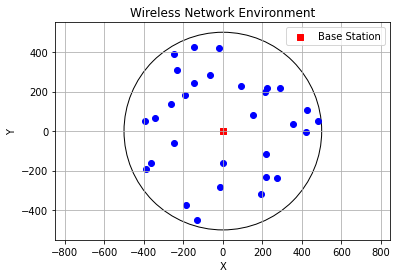

In [89]:
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
#plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

[(1.0, 0.0), (56.44444444444444, 0.0), (111.88888888888889, 0.0), (167.33333333333331, 0.0), (222.77777777777777, 0.0), (278.22222222222223, 0.0), (333.66666666666663, 0.0), (389.1111111111111, 0.0), (444.55555555555554, 0.0), (500.0, 0.0), (0.9629172873477994, 0.2697967711570243), (54.35133133029801, 15.228528860863147), (107.73974537324821, 30.18726095056927), (161.1281594161984, 45.14599304027539), (214.51657345914862, 60.10472512998152), (267.90498750209883, 75.06345721968765), (321.293401545049, 90.02218930939375), (374.6818155879992, 104.98092139909988), (428.0702296309495, 119.93965348880602), (481.4586436738997, 134.89838557851215), (0.8544194045464886, 0.5195839500354336), (48.22722861217957, 29.327627402000026), (95.60003781981267, 58.13567085396462), (142.97284702744574, 86.9437143059292), (190.34565623507885, 115.75175775789381), (237.71846544271193, 144.55980120985842), (285.091274650345, 173.36784466182297), (332.4640838579781, 202.17588811378758), (379.8368930656112, 230

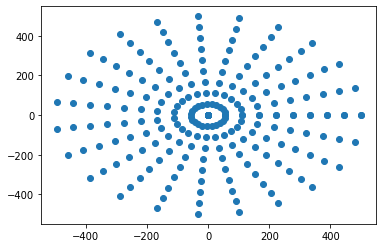

In [138]:
IRS_positions = 10  #50x24
IRS_Angles = 24

# Generate random points within the circle
radii = np.linspace(1, GRID_RADIUS, IRS_positions)
angles = np.linspace(0, 2 * np.pi, IRS_Angles = 24)

R, A = np.meshgrid(radii,angles)

# Calculate the x and y coordinates using polar to Cartesian conversion
x_coords = R * np.cos(A)
y_coords = R * np.sin(A)

# Create a list of coordinate pairs in meters
circle_points = list(zip(x_coords.flatten().tolist(), y_coords.flatten().tolist()))

print(circle_points)
print(len(circle_points))
plt.scatter(x_coords, y_coords)

In [139]:
Outage_at_diff_pos = []
NUM_SIMULATIONS = 100


for pos in range(IRS_positions*IRS_positions):
    # Generate IRS
    irs_position = circle_points[pos]

    # Compute the distances from each user to the IRS
    d_rm = compute_distances(user_positions, irs_position)
    d_rm = d_rm.reshape(1,NUM_USERS_NEW)
    #print('d_rm:'"\n", d_rm)
    #print(np.shape(d_rm)) 
    #print()

    # Compute the distances from base_station to the IRS
    d_i = compute_distances(base_station_position, irs_position)
    d_i = d_i.reshape(-1, 1)
    #print('d_i:'"\n", d_i)
    #print(np.shape(d_i)) 
    #print()


    # Initialize list to store individual outage probabilities
    outage_probabilities_2 = []

    #Performing for IRS
    h_m = np.array(rayleigh_channel)
    h_m = h_m.reshape(1,-1)

    # Perform simulations
    for i in range(NUM_SIMULATIONS):
        # Generate the Nakagami Channel from each user to the IRS (f_m)
        f_m = []
        fading = []
        for user in range(NUM_USERS_NEW):
            fading.append(generate_nakagami_samples(m, omega, N))
        f_m = np.array(fading)
        
        f_m_transpose = np.transpose(f_m)
        # Generate the Nakagami Channel from base_station to the IRS (g)
        g = generate_nakagami_samples(m, omega, N)
        g = g.reshape(N,1)
        
        # Initialize an empty list to store the results for each column
        results_list = []
        
        # Loop over each column index
        for column_index in range(NUM_USERS_NEW):
            
            # Extract the single column from f_m_transpose using indexing and transpose
            single_column = f_m_transpose[:, column_index]
            single_column = single_column.reshape(1, N)  # Reshape to (1, N)
            
            # Perform element-wise multiplication of the single row with g
            result = np.dot(single_column, g)
            results_list.append(result)
            
        # Convert the list of results into a numpy array
        results_array = np.squeeze(results_list)
        results_array = results_array.reshape(1,NUM_USERS_NEW)
        
        # Determine the angle associated with each complex number in radians
        angles_radians = np.angle(results_array)
        
        # Compute the array that will nullify the angle/phase to give us the scalar value
        r = 1
        polar_results = r * np.exp(1j *-1*angles_radians)
        
        # Compute the product that will nullify the angle/phase to give us the scalar value
        product = polar_results * results_array
        product_numerator = product.real
        
        # Compute the interediate link budget (in watts) for each user in the system
        link_inter = []
        for j in range(NUM_USERS_NEW):
            link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(d_m[0][j])**PATH_LOSS_EXPONENT + (product_numerator[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
            link_inter.append(link_inter_value)  # Append the computed value to the list
            
        # Convert the list to a numpy array
        link_inter = np.array(link_inter)
        link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
        
        # Calculate link_budget using the updated link_inter array
        link_budget = 10 * np.log10(link_inter_array) + 30  # Need to add actual noise power
        link_budget = link_budget.reshape(1,NUM_USERS_NEW)
        
        #Calculate the noise value
        noise = -133 # in dBm
        
        SNR_matrix = []
        # Calculate SNR
        for k in range(NUM_USERS_NEW):
            SNR = compute_SNR(link_budget[0][k], noise)
            SNR_matrix.append(SNR)
        
        SNR_matrix = np.array(SNR_matrix)
        SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
        
        # Calculate rate 
        rate_matrix = compute_rate(SNR_matrix)
        rate_matrix_new = rate_matrix.flatten()
        
        # Compute outage probability at each iteration
        outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
        outage_probabilities_2.append(outage_probability_2)
        # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
        
    # Compute average outage probability
    average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
    Outage_at_diff_pos.append(average_outage_probability_2)

print(Outage_at_diff_pos)
print(len(Outage_at_diff_pos))

[0.0, 0.07566666666666666, 0.34633333333333316, 0.5389999999999999, 0.642, 0.6973333333333332, 0.7290000000000001, 0.7456666666666666, 0.7906666666666666, 0.8363333333333334, 0.0, 0.079, 0.309, 0.5543333333333332, 0.627, 0.687, 0.71, 0.763, 0.8093333333333333, 0.8450000000000003, 0.0, 0.09466666666666665, 0.37866666666666665, 0.5576666666666668, 0.6143333333333333, 0.682, 0.7176666666666667, 0.7826666666666666, 0.8283333333333333, 0.8710000000000002, 0.0, 0.08999999999999998, 0.36033333333333323, 0.5183333333333333, 0.6459999999999999, 0.6743333333333333, 0.7293333333333333, 0.7760000000000001, 0.8306666666666669, 0.8673333333333336, 0.0, 0.09566666666666666, 0.33433333333333337, 0.5406666666666667, 0.6569999999999999, 0.705, 0.7609999999999999, 0.7996666666666666, 0.8300000000000003, 0.8653333333333336, 0.0, 0.08800000000000001, 0.34233333333333327, 0.5589999999999998, 0.626, 0.698, 0.7746666666666667, 0.812, 0.8286666666666669, 0.8686666666666667, 0.0, 0.09666666666666666, 0.35733333

In [119]:
x_axis, y_axis = zip(*circle_points)
z_axis = np.array(Outage_at_diff_pos)
print(y_axis)
print(1)

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.127877161684506, 1.4301364204716183, 2.7323956792587305, 4.0346549380458425, 5.3369141968329545, 6.6391734556200666, 7.9414327144071795, 9.243691973194291, 10.545951231981403, 11.848210490768516, 13.150469749555628, 14.45272900834274, 15.754988267129852, 17.057247525916967, 18.359506784704077, 19.661766043491188, 20.9640253022783, 22.266284561065415, 23.568543819852525, 24.870803078639636, 26.17306233742675, 27.475321596213863, 28.777580855000974, 30.079840113788084, 31.382099372575198, 32.684358631362315, 33.986617890149425, 35.288877148936535, 36.591136407723646, 37.89339566651076, 39.195654925297866, 40.49791418408498, 41.800173442872094, 43.10243270165921, 44.40469196044632, 45.70695121923343, 47.00921047802054, 48.31146973680766, 49

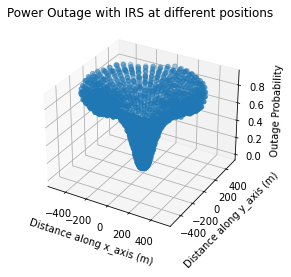

In [127]:
ax = plt.axes(projection = "3d")
ax.set_title("Power Outage with IRS at different positions")
ax.set_xlabel("Distance along x_axis (m)")
ax.set_ylabel("Distance along y_axis (m)")
ax.set_zlabel("Outage Probability")
ax.scatter(x_axis, y_axis, z_axis)


